In [16]:
import requests
from bs4 import BeautifulSoup
headers={'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}
url='http://www.weather.com.cn/weather/101280601.shtml'
res=requests.get(url,headers=headers)
res.encoding='utf-8'
bs =  BeautifulSoup(res.text,'html.parser')
weather_list = bs.find(class_ = 't clearfix')
weathers = weather_list.find_all('li')

for weather in weathers:
    print(weather.text)


11日（今天）


多云

15℃





<3级




12日（明天）


多云转阴

21℃/15℃






<3级




13日（后天）


阴转多云

24℃/18℃






<3级




14日（周四）


多云

25℃/19℃






<3级




15日（周五）


多云

25℃/20℃






<3级




16日（周六）


多云转小雨

26℃/19℃






<3级转3-4级




17日（周日）


小雨

24℃/19℃






3-4级





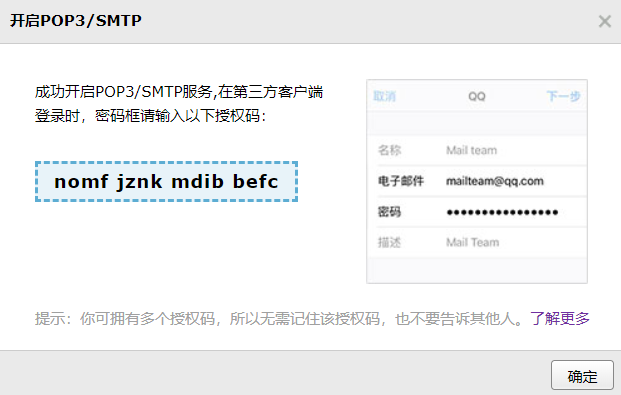

In [ ]:
import smtplib 
#smtplib是python的一个内置库，所以不需要用pip安装
from email.mime.text import MIMEText
from email.header import Header
mailhost='smtp.qq.com'
#把qq邮箱的服务器地址赋值到变量mailhost上，地址需要是字符串的格式。
qqmail = smtplib.SMTP()
#实例化一个smtplib模块里的SMTP类的对象，这样就可以SMTP对象的方法和属性了
qqmail.connect(mailhost,25)
#连接服务器，第一个参数是服务器地址，第二个参数是SMTP端口号。
account = input('请输入你的邮箱：')
#获取邮箱账号
password = input('请输入你的密码：')
#获取邮箱密码
qqmail.login(account,password)
#登录邮箱，第一个参数为邮箱账号，第二个参数为邮箱密码    

receiver=input('请输入收件人的邮箱：')
#获取收件人的邮箱


#引入Header和MIMEText模块
content=input('请输入邮件正文：')
#输入你的邮件正文
message = MIMEText(content, 'plain', 'utf-8')
#实例化一个MIMEText邮件对象，该对象需要写进三个参数，分别是邮件正文，文本格式和编码.
subject = input('请输入你的邮件主题：')
#用input()获取邮件主题  
message['Subject'] = Header(subject, 'utf-8')
#在等号的右边，是实例化了一个Header邮件头对象，该对象需要写入两个参数，分别是邮件主题和编码，然后赋值给等号左边的变量message['Subject']。

try:
    qqmail.sendmail(sender, receiver, message.as_string())
#发送邮件，调用了sendmail()方法，写入三个参数，分别是发件人，收件人，和字符串格式的正文。
    print ('邮件发送成功')
except:
    print ('邮件发送失败')
qqmail.quit()  
#退出邮箱

In [ ]:
import schedule
import time
#引入schedule和time

def job():
    print("I'm working...")
#定义一个叫job的函数，函数的功能是打印'I'm working...'

schedule.every(10).minutes.do(job)       #部署每10分钟执行一次job()函数的任务
schedule.every().hour.do(job)            #部署每×小时执行一次job()函数的任务
schedule.every().day.at("10:30").do(job) #部署在每天的10:30执行job()函数的任务
schedule.every().monday.do(job)          #部署每个星期一执行job()函数的任务
schedule.every().wednesday.at("13:15").do(job)#部署每周三的13：15执行函数的任务

while True:
    schedule.run_pending()
    time.sleep(1)    
#13-15都是检查部署的情况，如果任务准备就绪，就开始执行任务。  

In [2]:
import requests
import smtplib
import schedule
import time
from bs4 import BeautifulSoup
from email.mime.text import MIMEText
from email.header import Header

#account = input('请输入你的邮箱：')
#password = input('请输入你的密码：')
#receiver = input('请输入收件人的邮箱：')
account = '972229787@qq.com'
password = 'nomfjznkmdibbefc'
receiver = '1071869428@qq.com'
def weather_spider():
    headers={'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}
    url='http://www.weather.com.cn/weather/101280601.shtml'
    res=requests.get(url,headers=headers)
    res.encoding='utf-8'
    soup=BeautifulSoup(res.text,'html.parser')
    tem1= soup.find(class_='tem')
    weather1= soup.find(class_='wea')
    tem=tem1.text
    print(tem)
    weather=weather1.text
    return tem,weather

def send_email(tem,weather):
    global account,password,receiver
    mailhost='smtp.qq.com'
    qqmail = smtplib.SMTP()
    qqmail.connect(mailhost,25)
    qqmail.login(account,password)
    content= tem+weather
    message = MIMEText(content, 'plain', 'utf-8')
    subject = '今日天气预报'
    message['Subject'] = Header(subject, 'utf-8')
    try:
        qqmail.sendmail(account, receiver, message.as_string())
        print ('邮件发送成功')
    except:
        print ('邮件发送失败')
    qqmail.quit()
 
tem,weather = weather_spider()
send_email(tem,weather)
print('任务完成')
    
'''def job():
    print('开始一次任务')
    tem,weather = weather_spider()
    send_email(tem,weather)
    print('任务完成')

schedule.every().day.at("08:50").do(job) 
while True:
    schedule.run_pending()
    time.sleep(1)'''


15℃

邮件发送成功
任务完成


'def job():\n    print(\'开始一次任务\')\n    tem,weather = weather_spider()\n    send_email(tem,weather)\n    print(\'任务完成\')\n\nschedule.every().day.at("08:50").do(job) \nwhile True:\n    schedule.run_pending()\n    time.sleep(1)'